##  Validação Holdout na prática

###  Import libraries


In [46]:
import numpy as np
from sklearn import datasets as ds
from sklearn import tree as tr
from sklearn import metrics as mt
from sklearn import model_selection as ms
from matplotlib import pyplot as plt


### 1.0 Treinamento como o Joaquim: O DS Novato

In [47]:
## Dados sintéticos para produção
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

# Gerado Dados para treinamento
X, y = ds.make_classification( n_samples=n_samples, n_features=n_features,
n_informative=n_informative, n_redundant=n_redundant,
random_state=random_state )


In [48]:


# Dados para produção
X, X_prod, y, y_prod = ms.train_test_split( X, y, test_size=0.2 )
#X_train, X_test. y_train, y_test

## Não há separação dos Dados
# Modelo treinado e validado com o dataset de Treinamento
model = tr.DecisionTreeClassifier( max_depth=38 )
model.fit( X, y )


# Previsão sobre os dados de treinamento
yhat = model.predict( X )
acc = mt.accuracy_score( y, yhat )
print( "Accuracy Over Training 80%: {}".format( acc ) )
## Publicação do Modelo em Produção


# Previsão sobre os dados de treinamento
yhat_prod = model.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production 20%: {}".format( acc_prod ) )


Accuracy Over Training 80%: 1.0
Accuracy Over Production 20%: 0.85125


Accuracy Over Test: 0.8653125


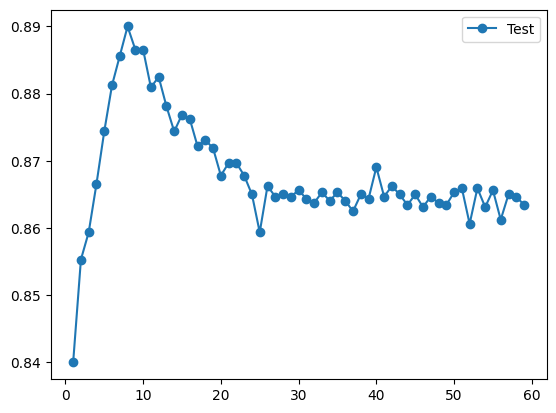

In [49]:
# 2.0 Estratégia Treino-Teste
## Separação entre Treino e Teste
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=random_state )
## Modelo treinado e validado com o dataset de Treinamento
model = tr.DecisionTreeClassifier( max_depth=58 )
model.fit( X_train, y_train )
## Previsão sobre os dados de teste
yhat_test = model.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test )
print( "Accuracy Over Test: {}".format( acc_test ) )
# Escolha de parâmetros do algoritmo
## Modelo treinado e validado com o dataset de Treinamento
values = [i for i in range( 1, 60 )]
test_scores = list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth=i )
    model.fit( X_train, y_train )
    # Previsão sobre os dados de test
    yhat_test = model.predict( X_test )
    acc_test = mt.accuracy_score( y_test, yhat_test )
    test_scores.append( acc_test )
## plot of train and test scores vs tree depth
plt.plot( values, test_scores, '-o', label='Test' )
plt.legend()
plt.show()

Accuracy Over Production: 0.8825


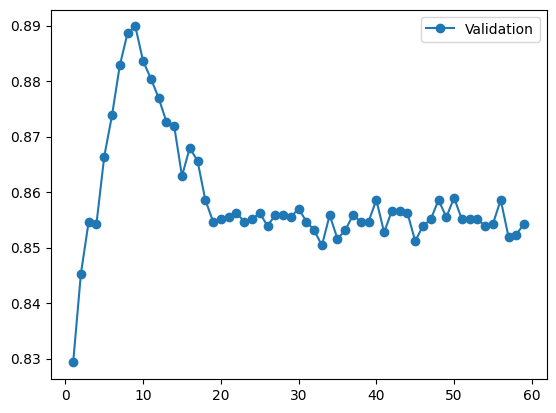

In [50]:

# Publicação do Modelo em Produção
## Modelo treinado e validado com o dataset de Treinamento
model_last = tr.DecisionTreeClassifier( max_depth=7 )
model_last.fit( np.concatenate( (X_train, X_test) ), np.concatenate((y_train, y_test)) )
model_last.fit( X_train, y_train )
## Previsão sobre os dados de produção
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )
# 3.0 Estratégia Treino-Validation-Teste
## Separação entre Treino e Teste
X_train, X_val, y_train, y_val = ms.train_test_split( X_train, y_train, test_size=0.2, random_state=random_state )
## Modelo treinado e validado com o dataset de Treinamento
values = [i for i in range( 1, 60 )]
val_scores = list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth=i )
    model.fit( X_train, y_train )
    # Previsão sobre os dados de treinamento
    yhat_val = model.predict( X_val )
    acc_val = mt.accuracy_score( y_val, yhat_val )
    val_scores.append( acc_val )
## plot of train and test scores vs tree depth
plt.plot( values, val_scores, '-o', label='Validation' )
plt.legend()
plt.show()

In [51]:

## Previsão sobre os dados de validacao
yhat_val = model.predict( X_val )
acc_val = mt.accuracy_score( y_val, yhat_val )
print( "Accuracy Over Validation: {}".format( acc_val ) )
## Modelo treinado e validado com o dataset de Treinamento
model_last = tr.DecisionTreeClassifier( max_depth=7 )
model_last.fit( np.concatenate( (X_train, X_val) ), np.concatenate((y_train, y_val)) )
## Previsão sobre os dados de test
yhat_test = model_last.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test )
print( "Accuracy Over Test: {}".format( acc_test ) )
# Previsão sobre os dados de treinamento
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )

Accuracy Over Validation: 0.854296875
Accuracy Over Test: 0.885625
Accuracy Over Production: 0.8825


###  3. Classificação com Overfitting na Classicaçao Aula 30

In [52]:
# Import libraries
import numpy as np
from sklearn import datasets as ds
from sklearn import tree as tr
from sklearn import metrics as mt
from sklearn import model_selection as ms
from matplotlib import pyplot as plt
# 1.0 Treinamento como o Joaquim: O DS Novato
## Dados sintéticos para produção
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0
# Dados para treinamento
X, y = ds.make_classification( n_samples=n_samples, n_features=n_features,
n_informative=n_informative, n_redundant=n_redundant, random_state=random_state )

X, X_prod, y, y_prod = ms.train_test_split( X, y, test_size=0.2 )
# ## Não há separação dos Dados
# Modelo treinado e validado com o dataset de Treinamento
model = tr.DecisionTreeClassifier( max_depth=38 )
model.fit( X, y )
# Previsão sobre os dados de treinamento
yhat = model.predict( X )
acc = mt.accuracy_score( y, yhat )
print( "Accuracy Over Training: {}".format( acc ) )


Accuracy Over Training: 1.0


In [53]:
# ## Publicação do Modelo em Produção
# Previsão sobre os dados de treinamento
yhat_prod = model.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )


Accuracy Over Production: 0.84975


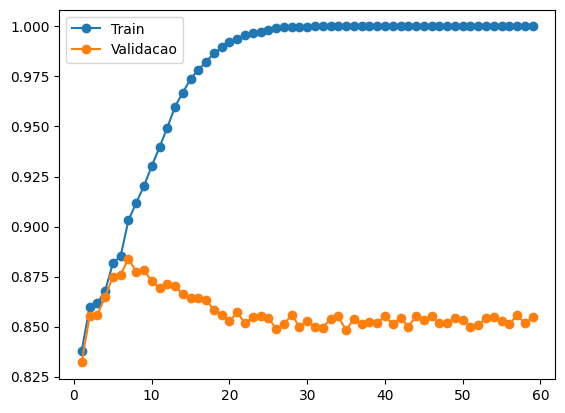

In [54]:
# # 2.0 Estratégia Treino-Validacao-Teste
# Separação entre Treino e Teste
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=random_state )
# Separação entre Treino e Validacao
X_train, X_val, y_train, y_val = ms.train_test_split( X_train, y_train, test_size= 0.2, random_state=random_state )

# ## Escolha de parâmetros do algoritmo
# Modelo treinado e validado com o dataset de Treinamento
values = [i for i in range( 1, 60 )]
train_scores, val_scores = list(), list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth=i )
    model.fit( X_train, y_train )
    # Previsão sobre os dados de treinamento
    yhat_train = model.predict( X_train )
    acc_train = mt.accuracy_score( y_train, yhat_train )
    train_scores.append( acc_train )
    
    # Previsão sobre os dados de test
    yhat_val = model.predict( X_val )
    acc_val = mt.accuracy_score( y_val, yhat_val )
    
    val_scores.append( acc_val )
# plot of train and test scores vs tree depth
plt.plot( values, train_scores, '-o', label='Train' )
plt.plot( values, val_scores, '-o', label='Validacao' )
plt.legend()
plt.show()

In [55]:

# Modelo treinado e validado com o dataset de Treinamento
model_last = tr.DecisionTreeClassifier( max_depth=4 )
model_last.fit( X_train , y_train )
# Previsão sobre os dados de treinamento
yhat_train = model_last.predict( X_train )
acc_train = mt.accuracy_score( y_train, yhat_train )
print( "Accuracy Over Training: {}".format( acc_train ) )
# Previsão sobre os dados de validacao
yhat_val = model_last.predict( X_val )
acc_val = mt.accuracy_score( y_val, yhat_val )
print( "Accuracy Over Validacao: {}".format( acc_val ) )
# Previsão sobre os dados de test
yhat_test = model_last.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test )
print( "Accuracy Over Testing: {}".format( acc_test ) )
# Previsão sobre os dados de treinamento
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Producao: {}".format( acc_prod ) )


Accuracy Over Training: 0.86787109375
Accuracy Over Validacao: 0.86484375
Accuracy Over Testing: 0.8675
Accuracy Over Producao: 0.86575


### 4. O problema do Overfitting na Regressão (AULA 31)

In [56]:
# # 0.0 Import Libraries
import numpy as np
import math
from matplotlib import pyplot as plt
def hidden_law( x ):
    return math.sin( 2*math.pi*x)

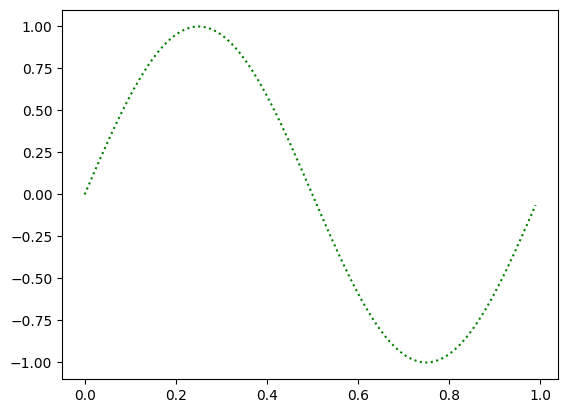

In [57]:
# # 0.0 Import Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import model_selection as ms
# # 1.0 Synthetic regression dataset
hidden_law = np.vectorize(lambda x: math.sin(2*math.pi*x)) # made to run on vectors
x_all = np.arange(0, 1, 0.01)
y_hidden = hidden_law(x_all)
plt.plot(x_all, y_hidden, ':g');

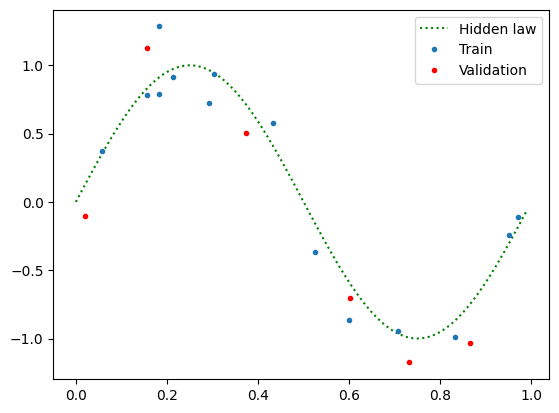

In [58]:

np.random.seed(42) # to make repeatable
noise = 0.2
samples = 20
# dataset
x = np.random.rand( samples )
y = np.sin( 2*np.pi*x ) + noise*np.random.randn( samples )
# split training and test dataset
x_train, x_valid, y_train, y_valid = ms.train_test_split( x, y, test_size=0.3 )
plt.plot(x_all, y_hidden, ':g')
plt.plot(x_train, y_train, '.')
plt.plot(x_valid, y_valid, 'r.')
plt.legend(['Hidden law', 'Train', 'Validation']);


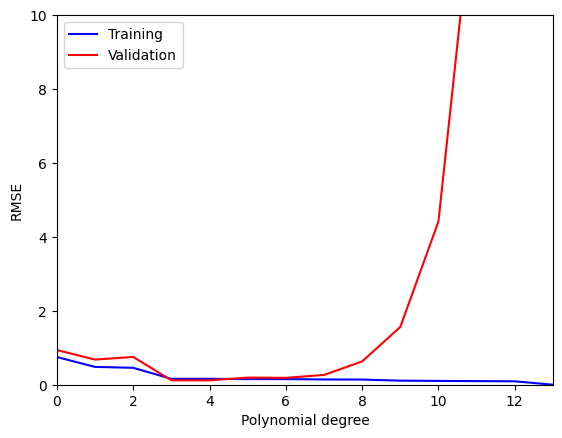

In [59]:
# ## Treinamento
max_poly_degree = 14
poly_degrees = range(max_poly_degree)
polys = []
for p in poly_degrees:
    poly_model = np.polyfit( x_train, y_train, p )
    polys.append( poly_model )
rmse_train = np.zeros( max_poly_degree )
rmse_val = np.zeros( max_poly_degree)
for p in poly_degrees:
    # predict over training dataset
    yhat_train = np.polyval( polys[p], x_train)
    rmse_train[p] = np.sqrt( np.mean( np.square( yhat_train - y_train ) ) )
    # predict over validation dataset
    yhat_val = np.polyval( polys[p], x_valid )
    rmse_val[p] = np.sqrt( np.mean( np.square( yhat_val - y_valid ) ) )
plt.plot( poly_degrees, rmse_train, 'b' )
plt.plot( poly_degrees, rmse_val, 'r' )
plt.axis( ( 0, max_poly_degree-1, 0, 10 ) )
plt.legend(['Training', 'Validation'])
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE');

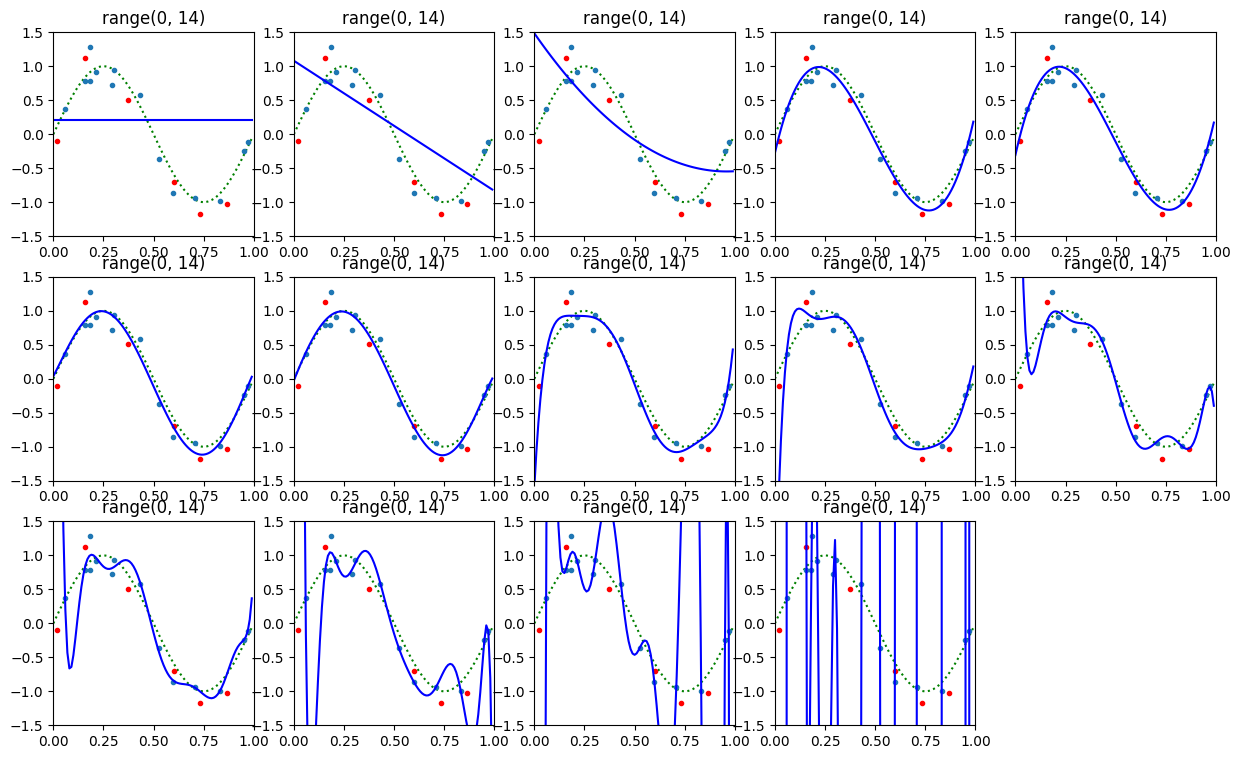

In [60]:
plt.figure(figsize=(15, 9))
for p in poly_degrees:
    plt.subplot(3, 5, p+1)
    y_pol = np.polyval( polys[p], x_all)
    
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_valid, y_valid, '.r')
    plt.plot(x_all, y_pol, 'b')
    plt.title(poly_degrees)
    plt.axis((0,1,-1.5, 1.5))

### Aula 35 - K-means Prática

In [1]:
# Import Libraries
from sklearn    import datasets as ds
from sklearn    import cluster as ct
from matplotlib import pyplot as plt
from sklearn    import metrics as mt
import numpy as np

In [3]:
# Synthetic clustering dataset
random_state = 0
X, y = ds.make_blobs( n_samples=100, 
n_features=2,
centers=4,
cluster_std= 0.5,
random_state=random_state)
# centers são os grupos
#n_features são as características de X, no caso duas. 
# cluster_std é a distancia entre os grupos  


In [63]:
X

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043],
       [-0.92819001,  7.02698199],
       [-1.74836345,  7.06307447],
       [-1.26789718,  7.25141327],
       [-0.98661744,  7.74968685],
       [-0.81984047,  7.50994722],
       [ 2.99684287,  0.22378413],
       [ 1.46870582,  1.86947425],
       [-0.33533163,  3.390122  ],
       [-1.86407034,  2.93379754],
       [ 2.62496786,  0.28025075],
       [ 2.11114739,  3.57660449],
       [-1.8219901 ,  7.61654999],
       [-1.91186205,  3.18750686],
       [ 2.28809874,  0.12954182],
       [ 0.5285368 ,  4.49723858],
       [-1.57613028,  2.58614312],
       [-0.565433  ,  3.65813966],
       [ 0.802314  ,  4.38196181],
       [ 2.79939362,

In [64]:
y

array([0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       2, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 1, 2, 0, 3, 1, 3, 2, 0, 2, 3, 2,
       2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 2, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 0])

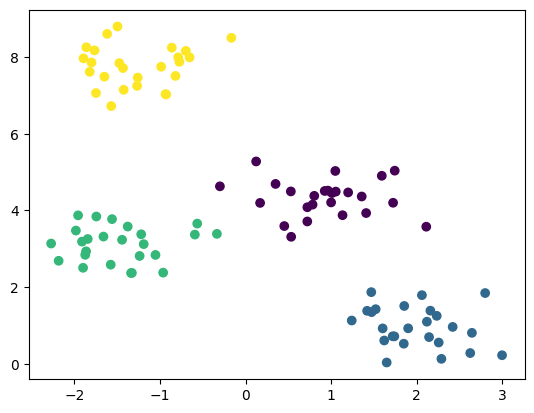

In [65]:
plt.scatter( X[:,0], X[:,1], c = y )


In [4]:
# 2.0 Training Model 
n_clusters = 2

# fit
#kmeans.fit( X )
kmeans = ct.KMeans( n_clusters=4, init='random', n_init=10, random_state=random_state )

labels = kmeans.fit_predict(X)
# performance
silhouette_avg = mt.silhouette_score(X, labels)
#kmeans.labels_
# draw figure
print('For n_clusters = {} - The Avg SS:{}'.format(n_clusters, silhouette_avg))



For n_clusters = 2 - The Avg SS:0.7083987104616173


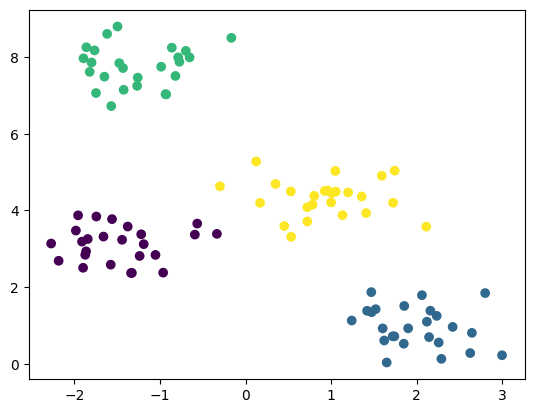

In [67]:
plt.scatter( X[:, 0], X[:, 1], c=kmeans.labels_ )

##### # 3.0 Fine Tunning 


In [71]:

np.arange(1, 10,1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
n_clusters = np.arange(2,11,1)
ss_list= []
#define 
for c in n_clusters:
    # define
    kmeans = ct.KMeans(n_clusters= c, 
                    init= 'random',
                    n_init= 10, 
                    random_state=0)
    # fit
    labels = kmeans.fit_predict(X)
    # performance
    silhouette_avg = mt.silhouette_score(X, labels)
    ss_list.append(silhouette_avg)
    #kmeans.labels_
    # draw figure
    print('For n_clusters = {} - The Avg SS:{}'.format(c, silhouette_avg))

For n_clusters = 2 - The Avg SS:0.570301896345626
For n_clusters = 3 - The Avg SS:0.6356855448662441
For n_clusters = 4 - The Avg SS:0.7083987104616173
For n_clusters = 5 - The Avg SS:0.5965985707520494
For n_clusters = 6 - The Avg SS:0.4888007351581176
For n_clusters = 7 - The Avg SS:0.39898682687164033
For n_clusters = 8 - The Avg SS:0.5152540326093132
For n_clusters = 9 - The Avg SS:0.41521811254739205
For n_clusters = 10 - The Avg SS:0.3317794818124999


Text(0, 0.5, 'silhouette Score Average')

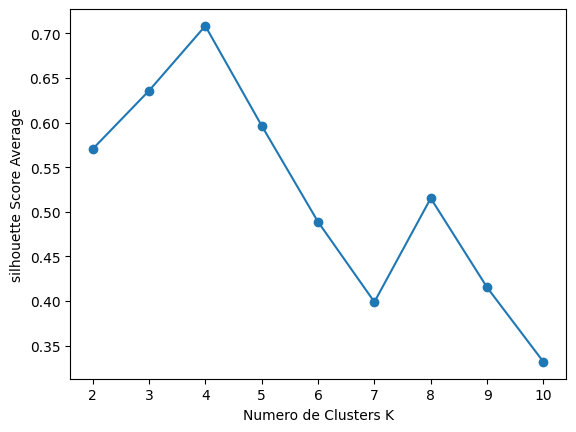

In [78]:
plt.plot(n_clusters, ss_list, marker = 'o')
plt.xlabel('Numero de Clusters K')
plt.ylabel( 'silhouette Score Average')
#plt.ylim([0,1])

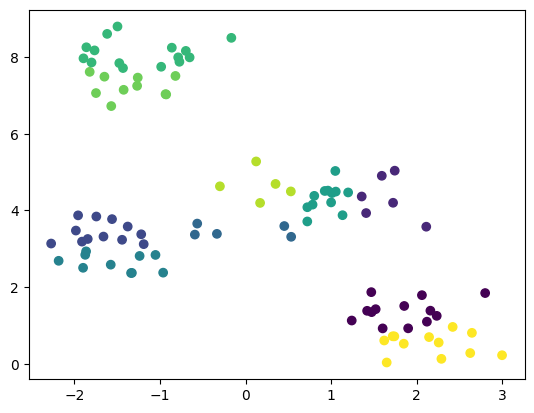

In [6]:
plt.scatter( X[:,0], X[:,1], c = kmeans.labels_)

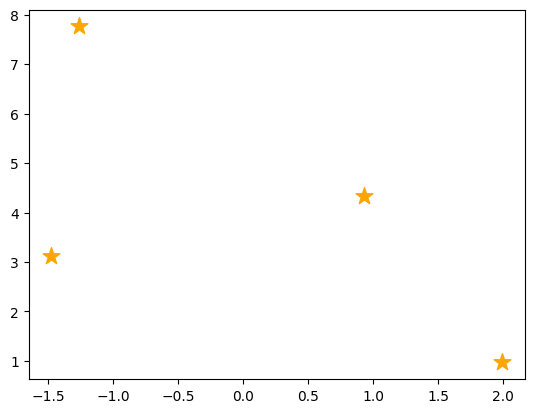

In [69]:
# 3.0 Training Model
for i in range( len( kmeans.cluster_centers_ ) ):
    plt.scatter( kmeans.cluster_centers_[i, 0],
    kmeans.cluster_centers_[i, 1],
    marker='*',
    c='orange',
    s=160 )

# 4.0 Algoritmo em Producao

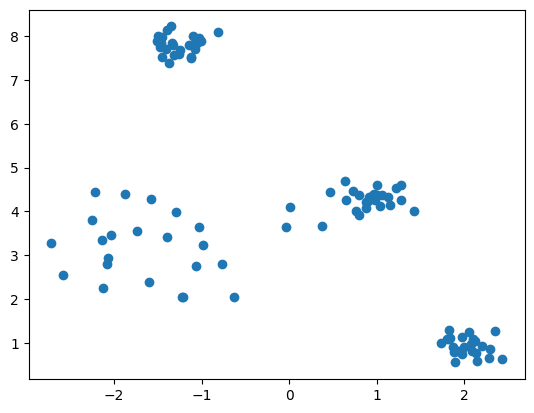

In [9]:
# Synthetic clustering dataset
random_state = 0
X, y = ds.make_blobs( n_samples=100, 
n_features=2,
centers=4,
cluster_std= [0.2, 0.2, 0.8, 0.2],
random_state=random_state)
plt.scatter( X[:,0], X[:,1])

In [11]:
c=4
kmeans = ct.KMeans(n_clusters= c, 
                    init= 'random',
                    n_init= 10, 
                    random_state=0)
    # fit
labels = kmeans.fit_predict(X)
    # performance
silhouette_avg = mt.silhouette_score(X, labels)
ss_list.append(silhouette_avg)
    #kmeans.labels_
    # draw figure
print('For n_clusters = {} - The Avg SS:{}'.format(c, silhouette_avg))
#plt.scatter(X[:,0], X[:,1], c=labels)

For n_clusters = 4 - The Avg SS:0.803380140709915


In [12]:
n_clusters = np.arange(2,11,1)
ss_list= []
#define 
for c in n_clusters:
    # define
    kmeans = ct.KMeans(n_clusters= c, 
                    init= 'random',
                    n_init= 10, 
                    random_state=0)
    # fit
    labels = kmeans.fit_predict(X)
    # performance
    silhouette_avg = mt.silhouette_score(X, labels)
    ss_list.append(silhouette_avg)
    #kmeans.labels_
    # draw figure
    print('For n_clusters = {} - The Avg SS:{}'.format(c, silhouette_avg))

For n_clusters = 2 - The Avg SS:0.6009049691492678
For n_clusters = 3 - The Avg SS:0.710086337272424
For n_clusters = 4 - The Avg SS:0.803380140709915
For n_clusters = 5 - The Avg SS:0.7593695790186242
For n_clusters = 6 - The Avg SS:0.659601227451686
For n_clusters = 7 - The Avg SS:0.47300187672994304
For n_clusters = 8 - The Avg SS:0.4989454185855322
For n_clusters = 9 - The Avg SS:0.6365513742174391
For n_clusters = 10 - The Avg SS:0.37077878861623803


Text(0, 0.5, 'Silhouette Score Average')

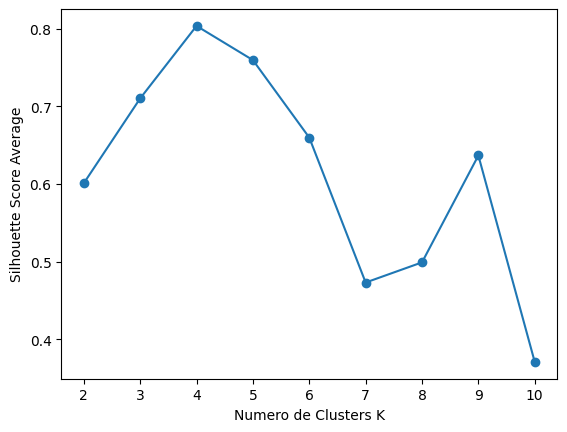

In [14]:
plt.plot(n_clusters, ss_list, marker = 'o')
plt.xlabel( 'Numero de Clusters K' )
plt.ylabel( 'Silhouette Score Average')